# <center> <h1> <font color='green'>  Instituto Federal de Educação, Ciência e Tecnologia de Minas Gerais (IFMG) - Campus Ibirité </h1> </center> </font>
<center> <h2> <font color='green'> Atividade - Banco de Dados - Mineração de Dados e Big Data </h2> </center> </font>

### <h3> <font color='black'> Aluna: Thalita Vieira Sales </h3> </font>

# <font color='orange'> Biblioteca </font>

In [15]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# <font color='orange'> Importar dados </font>


In [3]:
url = 'https://raw.githubusercontent.com/rafaellima13/machine_learning/main/projects.csv'
dados = pd.read_csv(url)
dados.head()

unfinished  expected_hours  price
0           1              26    192
1           1              88   9015
2           1              89   2577
3           1              42    275
4           1              39    170

# <font color='orange'> RENOMEANDO COLUNAS </font>

In [4]:
mapa = {
    "unfinished": "inacabado",
    "expected_hours":  "horas_esperadas",
    "price": "preco"
}
dados = dados.rename(columns=mapa)
dados.head()

inacabado  horas_esperadas  preco
0          1               26    192
1          1               88   9015
2          1               89   2577
3          1               42    275
4          1               39    170

In [5]:
dados['acabado'] = dados.inacabado.map({0: 1, 1: 0})
dados.tail()

inacabado  horas_esperadas  preco  acabado
2152          0               80   7518        1
2153          1               52   1332        0
2154          0               40    473        1
2155          0               75   5324        1
2156          1               37    377        0

<Axes: xlabel='horas_esperadas', ylabel='preco'>

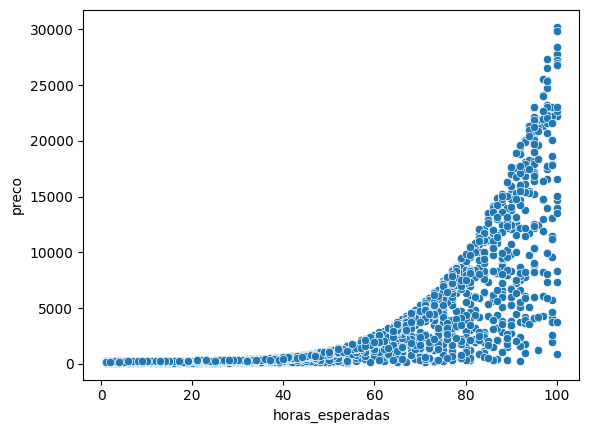

In [10]:
sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

<Axes: xlabel='horas_esperadas', ylabel='preco'>

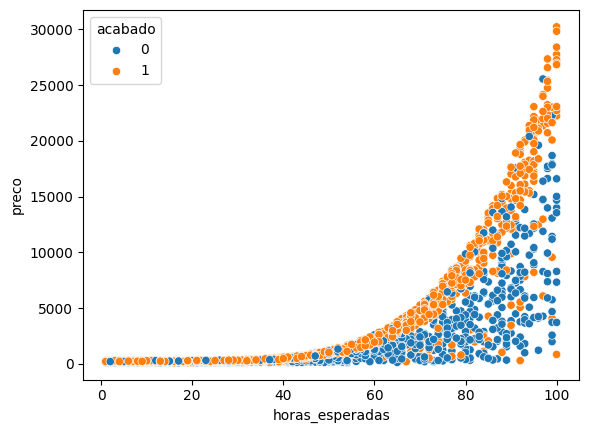

In [11]:
sns.scatterplot(x="horas_esperadas", y="preco", hue="acabado", data=dados)

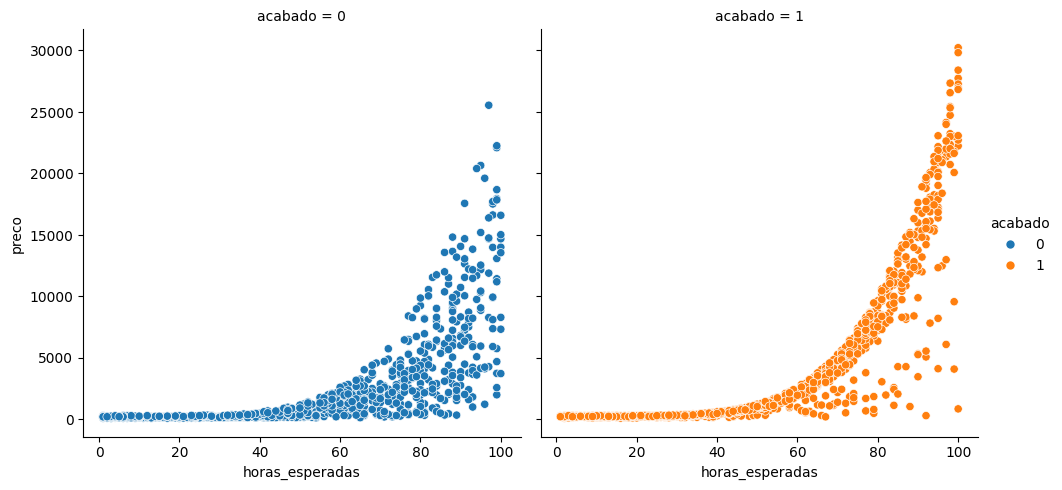

In [12]:
sns.relplot(x="horas_esperadas", y="preco", hue="acabado", col="acabado", data=dados)

# <font color='orange'> BALANCEAMENTO DE DADOS </font>

In [13]:
dados.acabado.value_counts()

acabado
1    1134
0    1023
Name: count, dtype: int64

# <font color='orange'> CLASSIFICAÇÃO BINÁRIA </font>


- CLASSES (Y) -> BOUGHT (1/0) -> CLASSIFICAÇÃO BINARIA
- FEATURE NÃO DEFINE SE CLASSIFICAÇÃO É BINARIA


In [14]:
x = dados[["horas_esperadas", "preco"]] #features
y = dados["acabado"] #classes

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

train_x = x[:75]
test_x = x[75:]
train_y = y[:75]
test_y = y[75:] #comparar com as previsões do modelo
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

model = SVC() #cria modelo
model.fit(train_x, train_y) #treina
accuracia = model.score(test_x, test_y) #teste
# previsoes = model.predict(test_x) #teste
print("A acurácia foi %.2f%%" % (accuracia * 100))

Treinaremos com 75 elementos e testaremos com 2082 elementos
A acurácia foi 45.92%


In [19]:
#acuracia
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB()
modelo.fit(train_x, train_y)
modelo.score(test_x, test_y)

0.510566762728146

In [20]:
#teste aleatorio
modelo.predict([[100, 1560], [23,46], [73,2500]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0, 0, 0])

# <font color='orange'> SEPARAÇÃO DO TREINO E TESTE </font>

In [21]:
#SEPARAR TREINO E TESTE
seed = 20
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state= seed, test_size = 0.25)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

Treinaremos com 1617 elementos e testaremos com 540 elementos


# <font color='orange'> MEU MODELO CLASSIFICADOR </font>

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

model = SVC() #cria modelo
model.fit(train_x, train_y) #treina
accuracia = model.score(test_x, test_y) #teste
# previsoes = model.predict(test_x) #teste
print("A acurácia foi %.2f%%" % (accuracia * 100))

A acurácia foi 56.30%


# <font color='orange'> COMPARAÇÃO DE ACURACIA DUMMY (BASELINE) </font>

In [23]:
from sklearn.dummy import DummyClassifier
dummy_stratified = DummyClassifier() #CRIA MODELO
dummy_stratified.fit(train_x, train_y) #TREINA MODELO
acuracia = dummy_stratified.score(test_x, test_y) * 100 #TESTE MODELO
print("A acurácia do dummy stratified foi %.2f%%" % acuracia) #IMPRIME RESULTADO

A acurácia do dummy stratified foi 52.04%


## <font color='orange'> VERIFICAÇÃO DE PROPORÇÃO DE TREINO E TESTE </font>

In [24]:
dados['acabado'].value_counts()

acabado
1    1134
0    1023
Name: count, dtype: int64

In [25]:
train_y.value_counts() #classes

acabado
1    853
0    764
Name: count, dtype: int64

In [26]:
test_y.value_counts()

acabado
1    281
0    259
Name: count, dtype: int64

In [27]:
#SEPARAR TREINO E TESTE
seed = 20
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state= seed, test_size = 0.25, stratify= y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

Treinaremos com 1617 elementos e testaremos com 540 elementos


# <font color='orange'> MODELO CLASSIFICADOR </font>

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

model = SVC() #cria modelo
model.fit(train_x, train_y) #treina
accuracia = model.score(test_x, test_y) #teste
# previsoes = model.predict(test_x) #teste
print("A acurácia foi %.2f%%" % (accuracia * 100))

A acurácia foi 53.15%


# <font color='orange'> COMPARAÇÃO DE ACURACIA DUMMY (BASELINE) </font>

In [29]:
from sklearn.dummy import DummyClassifier
dummy_stratified = DummyClassifier() #CRIA MODELO
dummy_stratified.fit(train_x, train_y) #TREINA MODELO
acuracia = dummy_stratified.score(test_x, test_y) * 100 #TESTE MODELO
print("A acurácia do dummy stratified foi %.2f%%" % acuracia) #IMPRIME RESULTADO

A acurácia do dummy stratified foi 52.59%


# <font color='orange'> USANDO O MODELO </font>

In [30]:
model.predict([[73,2500]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

<Axes: xlabel='horas_esperadas', ylabel='preco'>

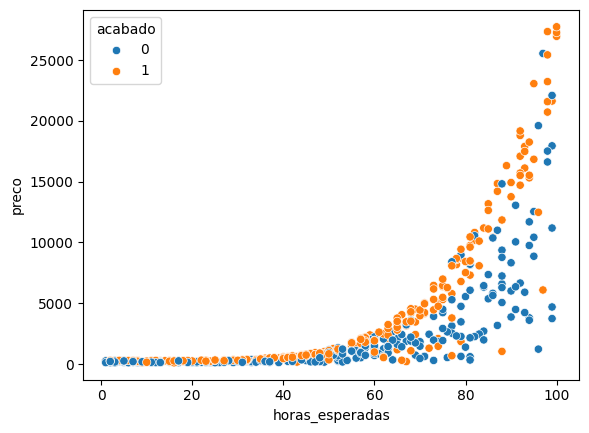

In [31]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=test_y, data=test_x)

1 100 101 27738


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


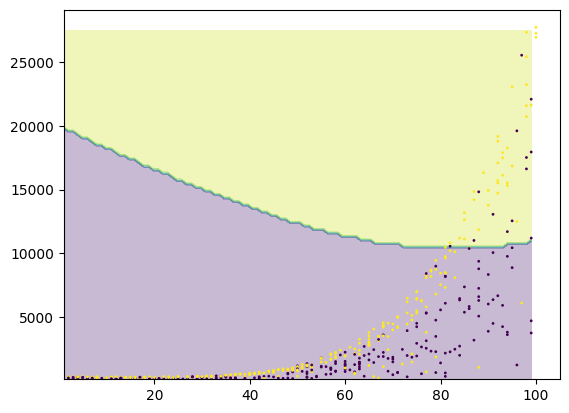

In [32]:
import numpy as np
x_min = test_x.horas_esperadas.min()
x_max = test_x.horas_esperadas.max()
y_min = test_x.preco.min()
y_max = test_x.preco.max()
print(x_min, x_max,y_min,y_max)


pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos


Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z


import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(test_x.horas_esperadas, test_x.preco, c=test_y, s=1)


# DECISION BOUNDARY

# <font color='orange'> Teste 2 - SVC </font>

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

x = dados[["horas_esperadas", "preco"]] #features
y = dados["acabado"] #classes

seed = 20
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state= seed, test_size = 0.25)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

model = SVC(gamma="auto") #cria modelo
model.fit(train_x, train_y) #treina
accuracia = model.score(test_x, test_y) #teste
# previsoes = model.predict(test_x) #teste
print("A acurácia foi %.2f%%" % (accuracia * 100))

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 59.81%


1 100 100 25427


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


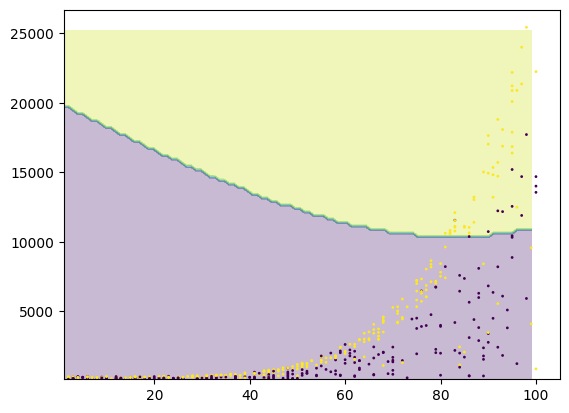

In [34]:
import numpy as np
x_min = test_x.horas_esperadas.min()
x_max = test_x.horas_esperadas.max()
y_min = test_x.preco.min()
y_max = test_x.preco.max()
print(x_min, x_max,y_min,y_max)


pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos


Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z


import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(test_x.horas_esperadas, test_x.preco, c=test_y, s=1)


# DECISION BOUNDARY

# <font color='orange'> Teste 3 - StandardScaler </font>

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

x = dados[["horas_esperadas", "preco"]] #features
y = dados["acabado"] #classes

seed = 20
np.random.seed(seed)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify= y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

scaler = StandardScaler()
scaler.fit(raw_train_x) # criando o normalizador treinando com raw
train_x = scaler.transform(raw_train_x) #treino x normalizado
test_x = scaler.transform(raw_test_x) #teste x normalizado

model = SVC(gamma="auto") #cria modelo
model.fit(train_x, train_y) #treina
accuracia = model.score(test_x, test_y) #teste
# previsoes = model.predict(test_x) #teste
print("A acurácia foi %.2f%%" % (accuracia * 100))

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 70.37%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


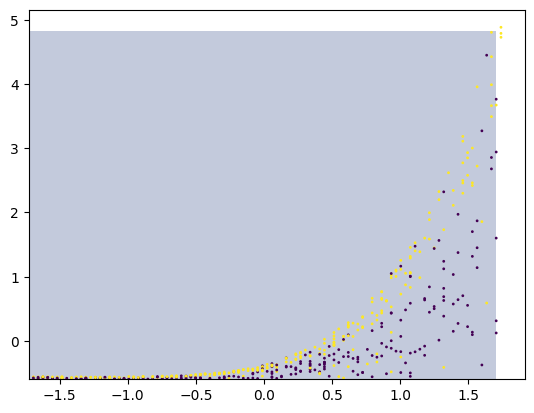

In [37]:
import numpy as np

data_x = test_x[:,0]
data_y = test_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos


Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z


import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=test_y, s=1)


# DECISION BOUNDARY


# <font color='orange'>DUMMY </font>

In [38]:
from sklearn.dummy import DummyClassifier
dummy_stratified = DummyClassifier() #CRIA MODELO
dummy_stratified.fit(train_x, train_y) #TREINA MODELO
acuracia = dummy_stratified.score(test_x, test_y) * 100 #TESTE MODELO
print("A acurácia do dummy stratified foi %.2f%%" % acuracia) #IMPRIME RESULTADO

A acurácia do dummy stratified foi 52.59%


# <font color='orange'> USANDO O MODELO SVC STANDARD SCALER </font>

In [39]:
projeto = [[100,200]]
projeto = scaler.transform(projeto)
projeto

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 1.73886706, -0.57782378]])

In [40]:
modelo.predict(projeto)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])